In [1]:
import pandas as pd
from siuba import *
from siuba.siu import call
from plotnine import *
import json
import matplotlib.pyplot as pp
import tidytext
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# load all the data
commits_raw = pd.read_pickle("../data/graphql/commits_total.pkl")
commits_df = pd.DataFrame()
for repo in commits_raw:
    commits_df = pd.concat([commits_df, pd.DataFrame(repo)])


In [3]:
issues_total = pd.read_pickle("../data/graphql/issues_total.pkl")
issuespr_total = pd.read_pickle("../data/graphql/issuespr_total.pkl")
issues_df = pd.concat((pd.DataFrame(issues_total), pd.DataFrame(issuespr_total)))


In [4]:
with open("../data/repos/topic_combined.json", "r") as read_file:
    raw = json.load(read_file)
repo_df = pd.DataFrame(raw)


In [5]:
# select relevant columns
selected_df = (
    repo_df
    >> select(
        ~_.endswith("url"),
        ~_.homepage,
        ~_.size,
        ~_.web_commit_signoff_required,
        ~_.visibility,
        ~_.score,
        ~_.default_branch,
        ~_.permissions,
    )
    >> filter(_.private == False, _.archived == False, _.disabled == False)
    >> select(~_.archived, ~_.disabled)
)


In [6]:
selected_df.corr()


/var/folders/5w/dhznpltj14n3nxr4fybjj8_w0000gn/T/ipykernel_57915/3065278569.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,id,private,fork,stargazers_count,watchers_count,has_issues,has_projects,has_downloads,has_wiki,has_pages,has_discussions,forks_count,open_issues_count,allow_forking,is_template,forks,open_issues,watchers
id,1.000000,NaN,NaN,-0.289823,-0.289823,0.014164,0.063037,-0.006833,0.105566,-0.048536,-0.134018,-0.270637,-0.283314,NaN,0.011518,-0.270637,-0.283314,-0.289823
private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fork,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stargazers_count,-0.289823,NaN,NaN,1.000000,1.000000,0.021781,-0.002645,0.005431,-0.092477,0.100473,0.172367,0.851789,0.452322,NaN,-0.016101,0.851789,0.452322,1.000000
watchers_count,-0.289823,NaN,NaN,1.000000,1.000000,0.021781,-0.002645,0.005431,-0.092477,0.100473,0.172367,0.851789,0.452322,NaN,-0.016101,0.851789,0.452322,1.000000
has_issues,0.014164,NaN,NaN,0.021781,0.021781,1.000000,0.419024,-0.004744,0.328706,-0.002435,0.034458,0.008747,0.023713,NaN,-0.011656,0.008747,0.023713,0.021781
has_projects,0.063037,NaN,NaN,-0.002645,-0.002645,0.419024,1.000000,-0.008671,0.721320,-0.032895,-0.053396,0.010471,-0.012836,NaN,0.026851,0.010471,-0.012836,-0.002645
has_downloads,-0.006833,NaN,NaN,0.005431,0.005431,-0.004744,-0.008671,1.000000,0.089662,0.011830,0.011349,0.005021,0.003604,NaN,0.005530,0.005021,0.003604,0.005431
has_wiki,0.105566,NaN,NaN,-0.092477,-0.092477,0.328706,0.721320,0.089662,1.000000,-0.115052,-0.167513,-0.088299,-0.154708,NaN,-0.011668,-0.088299,-0.154708,-0.092477
has_pages,-0.048536,NaN,NaN,0.100473,0.100473,-0.002435,-0.032895,0.011830,-0.115052,1.000000,0.222181,0.057312,0.080330,NaN,-0.032382,0.057312,0.080330,0.100473


watchers == watchers_count == stargazers_count

forks == forks_count

issues == open_issues_count

forks_count <> stargazers_count == 0.851789 corr


In [7]:
(
    selected_df
    >> select(
        ~_.watchers,
        ~_.fork,
        ~_.watchers_count,
        _.stargazers_count,
        _.forks_count,
        ~_.forks,
        _.open_issues_count,
        ~_.open_issues,
        ~_.forks_count,
        ~_.private
    )
).corr()


/var/folders/5w/dhznpltj14n3nxr4fybjj8_w0000gn/T/ipykernel_57915/208152933.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,id,stargazers_count,has_issues,has_projects,has_downloads,has_wiki,has_pages,has_discussions,open_issues_count,allow_forking,is_template
id,1.000000,-0.289823,0.014164,0.063037,-0.006833,0.105566,-0.048536,-0.134018,-0.283314,NaN,0.011518
stargazers_count,-0.289823,1.000000,0.021781,-0.002645,0.005431,-0.092477,0.100473,0.172367,0.452322,NaN,-0.016101
has_issues,0.014164,0.021781,1.000000,0.419024,-0.004744,0.328706,-0.002435,0.034458,0.023713,NaN,-0.011656
has_projects,0.063037,-0.002645,0.419024,1.000000,-0.008671,0.721320,-0.032895,-0.053396,-0.012836,NaN,0.026851
has_downloads,-0.006833,0.005431,-0.004744,-0.008671,1.000000,0.089662,0.011830,0.011349,0.003604,NaN,0.005530
has_wiki,0.105566,-0.092477,0.328706,0.721320,0.089662,1.000000,-0.115052,-0.167513,-0.154708,NaN,-0.011668
has_pages,-0.048536,0.100473,-0.002435,-0.032895,0.011830,-0.115052,1.000000,0.222181,0.080330,NaN,-0.032382
has_discussions,-0.134018,0.172367,0.034458,-0.053396,0.011349,-0.167513,0.222181,1.000000,0.273247,NaN,0.024793
open_issues_count,-0.283314,0.452322,0.023713,-0.012836,0.003604,-0.154708,0.080330,0.273247,1.000000,NaN,-0.023169
allow_forking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
refined_df = (
    selected_df
    >> select(
        ~_.watchers,
        ~_.fork,
        ~_.watchers_count,
        _.stargazers_count,
        _.forks_count,
        ~_.forks,
        _.open_issues_count,
        ~_.open_issues,
        ~_.forks_count,
        ~_.private
    )
)

In [9]:
refined_df

,id,node_id,name,full_name,owner,description,created_at,updated_at,pushed_at,stargazers_count,...,has_projects,has_downloads,has_wiki,has_pages,has_discussions,open_issues_count,license,allow_forking,is_template,topics
0,156157055,MDEwOlJlcG9zaXRvcnkxNTYxNTcwNTU=,Made-With-ML,GokuMohandas/Made-With-ML,"{'login': 'GokuMohandas', 'id': 8000987, 'node...","Learn how to responsibly develop, deploy and m...",2018-11-05T03:44:27Z,2023-01-18T14:24:54Z,2022-11-08T13:52:44Z,32107,...,True,True,True,False,False,6,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,False,"[data-engineering, data-science, deep-learning..."
1,240315046,MDEwOlJlcG9zaXRvcnkyNDAzMTUwNDY=,jina,jina-ai/jina,"{'login': 'jina-ai', 'id': 60539444, 'node_id'...",🔮 Build multimodal AI services via cloud nativ...,2020-02-13T17:04:44Z,2023-01-18T14:18:14Z,2023-01-18T16:21:18Z,17144,...,True,True,False,True,False,33,"{'key': 'apache-2.0', 'name': 'Apache License ...",True,False,"[aiops, airflow, cloud-native, creative-ai, cr..."
2,144863525,MDEwOlJlcG9zaXRvcnkxNDQ4NjM1MjU=,awesome-production-machine-learning,EthicalML/awesome-production-machine-learning,"{'login': 'EthicalML', 'id': 43532924, 'node_i...",A curated list of awesome open source librarie...,2018-08-15T14:28:41Z,2023-01-18T17:16:27Z,2023-01-16T06:42:25Z,13008,...,True,True,True,True,False,26,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,False,"[awesome, awesome-list, data-mining, deep-lear..."
3,135673451,MDEwOlJlcG9zaXRvcnkxMzU2NzM0NTE=,nni,microsoft/nni,"{'login': 'microsoft', 'id': 6154722, 'node_id...",An open source AutoML toolkit for automate mac...,2018-06-01T05:51:44Z,2023-01-18T12:49:05Z,2023-01-18T09:27:55Z,12415,...,True,True,True,False,True,290,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,False,"[automated-machine-learning, automl, bayesian-..."
4,192640529,MDEwOlJlcG9zaXRvcnkxOTI2NDA1Mjk=,label-studio,heartexlabs/label-studio,"{'login': 'heartexlabs', 'id': 48309720, 'node...",Label Studio is a multi-type data labeling and...,2019-06-19T02:00:44Z,2023-01-18T11:31:18Z,2023-01-18T17:09:25Z,11747,...,True,True,True,False,True,448,"{'key': 'apache-2.0', 'name': 'Apache License ...",True,False,"[annotation, annotation-tool, annotations, bou..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,580399205,R_kgDOIpgwZQ,step-functions-sagemaker-ml-pipeline,hkford/step-functions-sagemaker-ml-pipeline,"{'login': 'hkford', 'id': 82389275, 'node_id':...",ML pipeline with AWS Step Functions and Amazon...,2022-12-20T13:17:41Z,2022-12-20T13:33:21Z,2022-12-20T13:32:14Z,0,...,True,True,True,False,False,0,None,True,False,"[mlops, sagemaker, step-functions]"
1040,472158586,R_kgDOHCSReg,genome,edeliu2000/genome,"{'login': 'edeliu2000', 'id': 8235794, 'node_i...",AI AutoML Platform Services for Managing Milli...,2022-03-21T02:18:15Z,2022-12-09T17:27:37Z,2023-01-10T23:03:03Z,0,...,True,True,True,False,False,0,None,True,False,"[automlops, configurable-ai, controllable-ai, ..."
1041,499422453,R_kgDOHcSU9Q,ml-ops,khoaguin/ml-ops,"{'login': 'khoaguin', 'id': 88959106, 'node_id...",A Learning Journal on Machine Learning in Prod...,2022-06-03T07:38:42Z,2022-06-10T08:40:17Z,2023-01-16T07:24:02Z,0,...,True,True,True,False,False,0,None,True,False,[mlops]
1042,575407571,R_kgDOIkwF0w,Plant-disease-Detection,shashank1623/Plant-disease-Detection,"{'login': 'shashank1623', 'id': 86946068, 'nod...",Plant Disease Detection using convolutional n...,2022-12-07T12:53:33Z,2023-01-10T17:25:44Z,2023-01-10T17:29:52Z,0,...,True,True,True,False,False,0,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,False,"[adam-optimizer, cnn, d, deep-learning, develo..."


In [10]:
numeric_df = (refined_df
    >> select(_.stargazers_count,
    _.has_issues,
    _.has_projects,
    _.has_downloads,
    _.has_wiki,
    _.has_pages,
    _.has_discussions,
    _.open_issues_count,
    _.allow_forking,
    _.is_template)
    )

numeric_df.columns

Index(['stargazers_count', 'has_issues', 'has_projects', 'has_downloads',
       'has_wiki', 'has_pages', 'has_discussions', 'open_issues_count',
       'allow_forking', 'is_template'],
      dtype='object')

In [11]:
pca_numeric = PCA(n_components=2).fit(numeric_df)
pca_numeric_output = pca_numeric.transform(numeric_df)


In [12]:
pca_numeric.components_

array([[ 9.99739393e-01,  2.00089968e-06, -4.23702165e-07,
         1.05116254e-07, -1.78350107e-05,  2.05924756e-05,
         3.42646226e-05,  2.28285933e-02,  0.00000000e+00,
        -1.71099665e-06],
       [-2.28286255e-02,  3.17213767e-05, -4.63216244e-05,
         5.51692889e-07, -5.42367498e-04,  1.77972709e-04,
         9.67201175e-04,  9.99738760e-01, -0.00000000e+00,
        -4.20620095e-05]])

In [18]:
# https://stackoverflow.com/questions/47370795/pca-on-sklearn-how-to-interpret-pca-components
# good PCA refresher https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e


def pca_plot(transformed_data, components):

    x = transformed_data[:, 0]
    y = transformed_data[:, 1]
    n = components.shape[0]

    plt.scatter(x, y)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
    for i in range(n):
        plt.arrow(0, 0, components[i, 0], components[i, 1], color="r", alpha=0.5)
        plt.text(
            components[i, 0] * 1.15,
            components[i, 1] * 1.15,
            "Var " + str(i + 1),
            color="g",
            ha="center",
            va="center",
        )

def most_important_feature(components, data):
    most_important = [np.abs(components[i]).argmax() for i in range(components.shape[0])]

    initial_feature_names = data.columns

    most_important_names = [initial_feature_names[most_important[i]] for i in range(components.shape[0])]

    dic = {'PC{}'.format(i): most_important_names[i] for i in range(components.shape[0])}


    return pd.DataFrame(dic.items())

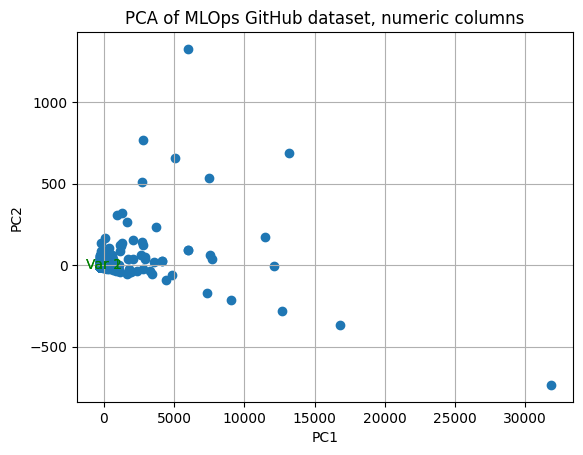

In [14]:
plt.title("PCA of MLOps GitHub dataset, numeric columns")
pca_plot(pca_numeric_output, pca_numeric.components_) 
plt.show()

In [19]:
most_important_feature(pca_numeric.components_, numeric_df)

,0,1
0,PC0,stargazers_count
1,PC1,open_issues_count


should i transform this data? feature scaling https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [15]:
scaled_numeric_df = StandardScaler().fit_transform(numeric_df)
pca_numeric_scaled = PCA(n_components=2).fit(scaled_numeric_df)
pca_numeric_scaled_output = pca_numeric_scaled.transform(scaled_numeric_df)

what does this mean?

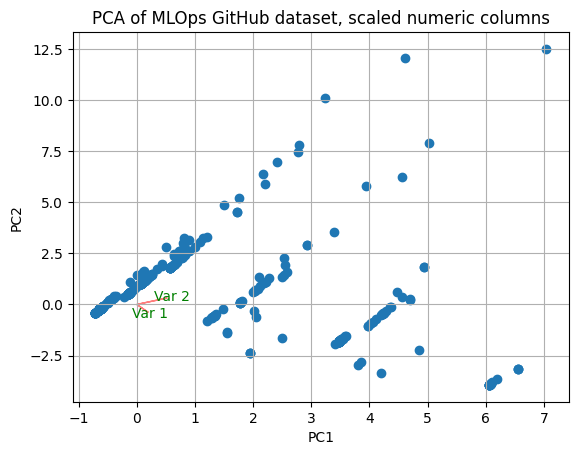

In [16]:
plt.title("PCA of MLOps GitHub dataset, scaled numeric columns")

pca_plot(pca_numeric_scaled_output, pca_numeric_scaled.components_) 
plt.show()

In [20]:
most_important_feature(pca_numeric_scaled.components_, numeric_df)

,0,1
0,PC0,has_wiki
1,PC1,open_issues_count
